<a href="https://colab.research.google.com/github/gitssjais/demo-repo/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEEP LEARNING PROJECT-FASHION CLOTHS IMAGE CLASSIFICATION**

PROJECT DESCRIPTION: CLASSIFY IMAGES OF FASHION CLOTHING

**USE OF CONVOLUTIONAL N N**

**1)**Importing  the libraries:

In [ ]:
import keras    

In [ ]:
from keras import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten 
from keras.layers import Dropout
from keras.layers import Dense


In [ ]:
import pandas as pd  
import numpy as np
import tensorflow as tf
np.set_printoptions(suppress=True,linewidth=120)
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()  

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(xtrain.shape,ytrain.shape)


(60000, 28, 28) (60000,)


In [ ]:
print(xtest.shape,ytest.shape)

(10000, 28, 28) (10000,)


In [ ]:
#number of pixels in the images
image_rows=xtrain[0].shape[0]
image_cols=xtrain[0].shape[1]

print("image_rows=",image_rows)
print("image_cols=",image_rows)

image_rows= 28
image_cols= 28


In [ ]:
xtrain=xtrain.reshape(xtrain.shape[0],image_rows,image_cols,1)/255
xtest=xtest.reshape(xtest.shape[0],image_rows,image_cols,1)/255

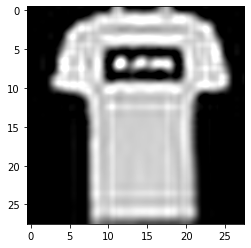

In [ ]:
plt.imshow(xtrain[1].reshape(28,28),cmap='gray',interpolation='sinc')

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_maker=LabelBinarizer()

ytrain=label_maker.fit_transform(ytrain)
ytest=label_maker.fit_transform(ytest)

In [ ]:
ytrain.shape

(60000, 10)

**DEFINE A CNN MODEL ARCHITECTURE**

***DEFINING A SEQUENTIAL MODEL***


In [ ]:
fm_classifier=Sequential()

First layer of convolution and pooling

In [ ]:
fm_classifier.add(Convolution2D(filters=32,kernel_size=5,input_shape=(28,28,1),activation='relu'))
fm_classifier.add(MaxPool2D(pool_size=(2,2)))
fm_classifier.add(Dropout(0.2))

# New Section
second layer of convolution and pooling

In [ ]:
fm_classifier.add(Convolution2D(filters=16,kernel_size=3,activation='relu'))
fm_classifier.add(MaxPool2D(pool_size=(2,2)))





In [ ]:
fm_classifier.add(Flatten())

In [ ]:
fm_classifier.add(Dense(128,activation='relu'))
fm_classifier.add(Dropout(0.2))
fm_classifier.add(Dense(128,activation='relu'))
fm_classifier.add(Dropout(0.2))
fm_classifier.add(Dense(256,activation='relu'))
fm_classifier.add(Dropout(0.2))
fm_classifier.add(Dense(256,activation='relu'))

**OUTPUT LAYER**

In [ ]:
fm_classifier.add(Dense(10,activation="softmax"))


**MODEL COMPILATION**

In [ ]:
fm_classifier.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

Lets see the model summary

In [ ]:
fm_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [ ]:
def plot_model_history(model_history):
  fig,axs=plt.subplots(1,2,figsize=(15,5))
  #summarize history for accuracy
  axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
  axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
  axs[0].set_title('Model accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')

  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),
                              len(model_history.history['accuracy'])/10)
                
  

  axs[0].legend(['train','val'],loc='best')

  #summarize history for loss
  axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
  axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
  axs[1].set_title('Model loss')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('loss')

  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),
                              len(model_history.history['loss'])/10
                              )
  axs[1].legend(['train','val'],loc='best')
 
  plt.show();
  

**Fitting the model**

In [ ]:
from keras.callbacks import EarlyStopping
stop_early=EarlyStopping(monitor='val_loss',min_delta=0.0001,
                        patience=5,verbose=1,
                        mode='auto',restore_best_weights=True)

In [ ]:
model_info=fm_classifier.fit(xtrain,ytrain,batch_size=120,epochs=40,
                             verbose=1,
                             callbacks=[stop_early],
                             validation_split=0.2)

Epoch 1/40
400/400 [==============================] - 32s 78ms/step - loss: 0.2908 - accuracy: 0.8947 - val_loss: 0.2837 - val_accuracy: 0.8978
Epoch 2/40
400/400 [==============================] - 31s 77ms/step - loss: 0.2845 - accuracy: 0.8969 - val_loss: 0.2645 - val_accuracy: 0.9031
Epoch 3/40
400/400 [==============================] - 31s 77ms/step - loss: 0.2775 - accuracy: 0.8989 - val_loss: 0.2664 - val_accuracy: 0.9048
Epoch 4/40
400/400 [==============================] - 31s 77ms/step - loss: 0.2725 - accuracy: 0.9005 - val_loss: 0.2821 - val_accuracy: 0.8986
Epoch 5/40
400/400 [==============================] - 31s 77ms/step - loss: 0.2672 - accuracy: 0.9035 - val_loss: 0.2672 - val_accuracy: 0.9019
Epoch 6/40
400/400 [==============================] - 31s 76ms/step - loss: 0.2669 - accuracy: 0.9023 - val_loss: 0.2673 - val_accuracy: 0.9010
Epoch 7/40
400/400 [==============================] - 31s 78ms/step - loss: 0.2617 - accuracy: 0.9049 - val_loss: 0.2532 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


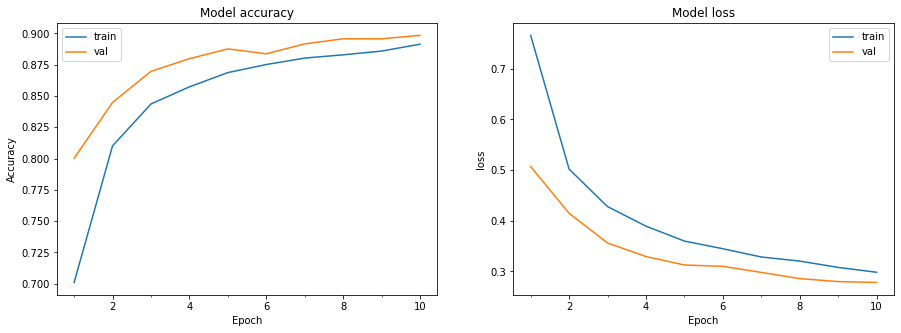

In [ ]:
plot_model_history(model_info)

In [ ]:
cloth_names={
              0:'T-shirt/Tops',
             1:'Trouser' ,
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'
            }


In [ ]:
predictions =fm_classifier.predict(xtest)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
predicted_cloths=label_maker.inverse_transform(predictions)

In [ ]:
print(predicted_cloths[:10] )

[9 2 1 1 6 1 4 6 5 7]


In [ ]:
ytest =label_maker.inverse_transform(ytest)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(ytest,predicted_cloths)
accuracy=accuracy_score(ytest,predicted_cloths)

In [ ]:

cloth_labels=pd.Series(label_maker.classes_).map(cloth_names).values

Accuracy score is: 89.44


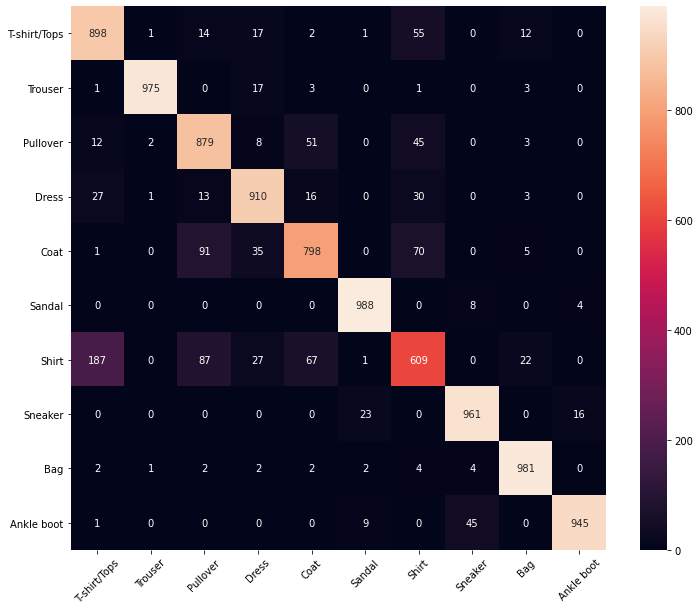

In [ ]:
print('Accuracy score is:',round(accuracy*100,2))

import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True,xticklabels=cloth_labels,yticklabels=cloth_labels,fmt='d')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [ ]:
results=pd.DataFrame(columns=['Real Cloth Names','Real Cloth Index','Predicted Cloth Index','Predicted Cloth Names'])
results['Real Cloth Index']=ytest
results['Predicted Cloth Index']=predicted_cloths
results['Real Cloth Names']=results['Real Cloth Index'].map(cloth_names)
results['Predicted Cloth Names']=results['Predicted Cloth Index'].map(cloth_names)
results.head(10)

,Real Cloth Names,Real Cloth Index,Predicted Cloth Index,Predicted Cloth Names
0,Ankle boot,9,9,Ankle boot
1,Pullover,2,2,Pullover
2,Trouser,1,1,Trouser
3,Trouser,1,1,Trouser
4,Shirt,6,6,Shirt
5,Trouser,1,1,Trouser
6,Coat,4,4,Coat
7,Shirt,6,6,Shirt
8,Sandal,5,5,Sandal
9,Sneaker,7,7,Sneaker


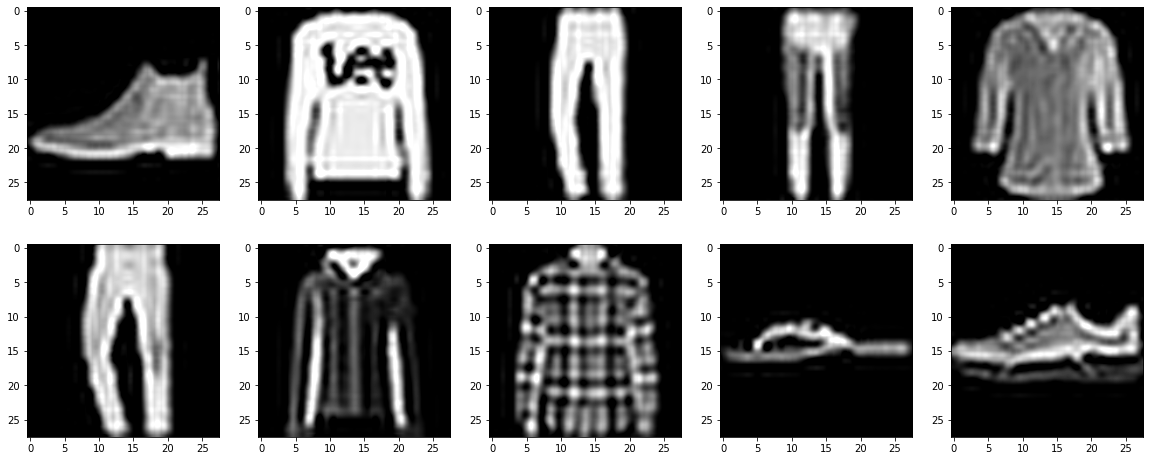

In [ ]:
fig=plt.figure(figsize=(20,8))
for i in range(1,11):
  ax=plt.subplot(2,5,i)
  plt.imshow(xtest[i-1].reshape(28,28),interpolation='sinc',cmap='gray')
plt.show() 
